# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [19]:

def StarFormationRate(L,band,TIR=0):
    # L is the luminosity in the given band
    # band is which correction to use. FUV, NUV, Halpha, or TIR
    # TIR is the total infrared luminoisty, used for dust correction
    
    # logCx  and extinction factor values are pulled 
    #from Kennicutt & Evans 2012 Table 1 & 2 respectively
    if band == 'FUV':
        logCx = 43.35 
        TIRcorr = 0.46
    
    elif band == 'NUV':
        logCx = 43.17
        TIRcorr = 0.27
        
    elif band == 'Halpha':
        logCx = 41.27
        TIRcorr = 0.0024
        
    elif band == 'TIR':
        logCx = 43.41
        TIRcorr = 0
        
    else: 
        print("Missing luminosity band, please specify FUV, NUV, Halpha, or TIR")
    
    Lnew = L + TIRcorr*TIR
    SFR = np.log10(Lnew) - logCx
    
    # Returns log of the SFR 
    return SFR
    




Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [13]:
Lsun = const.L_sun.to(u.erg/u.s).value


3.828e+33

In [20]:
#  WLM Dwarf Irregular Galaxy
# From Lee et al. 2009 WLM galaxy SFR derived from UV is -2.21 via GALEX
# From NED: 
Lnuv = 1.71e7*Lsun #GALEX NUV value
Ltir = 2.48e6*Lsun #Lnir IRAC value

StarFormationRate(Lnuv,'NUV',Ltir)


-2.3373504191027266

In [22]:
#  N24 Sc galaxy
# From Lee et al. 2009 N24 Sc galaxy SFR derived from UV is -0.7 via GALEX
# From NED:
Lnuv = 2.96e8*Lsun #GALEX NUV value
Ltir = 3.09e8*Lsun + 8.34e8*Lsun # Far-IR + Near-IR luminosity

StarFormationRate(Lnuv,'NUV',Ltir)



-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [35]:
# Create a function which returns the SFR Main Sequence
def SFRMainSequence(Mstar,z):
    # Mstar is the stellar mass of the galaxy in Msun
    # z is the redshift
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z
    
    #returns log(SFR)
    return alpha*(np.log10(Mstar) - 10.5) + beta
    

In [26]:
# MW at z=0
10**SFRMainSequence(6e10,0)
# Actual is 1 Msun/year

3.7558295562247412

In [28]:
# MW at z = 1
10**SFRMainSequence(6e10,1)

47.70305716298128

In [34]:
# create an array of stellar masses
Mass = np.linspace(1e9,1e12)

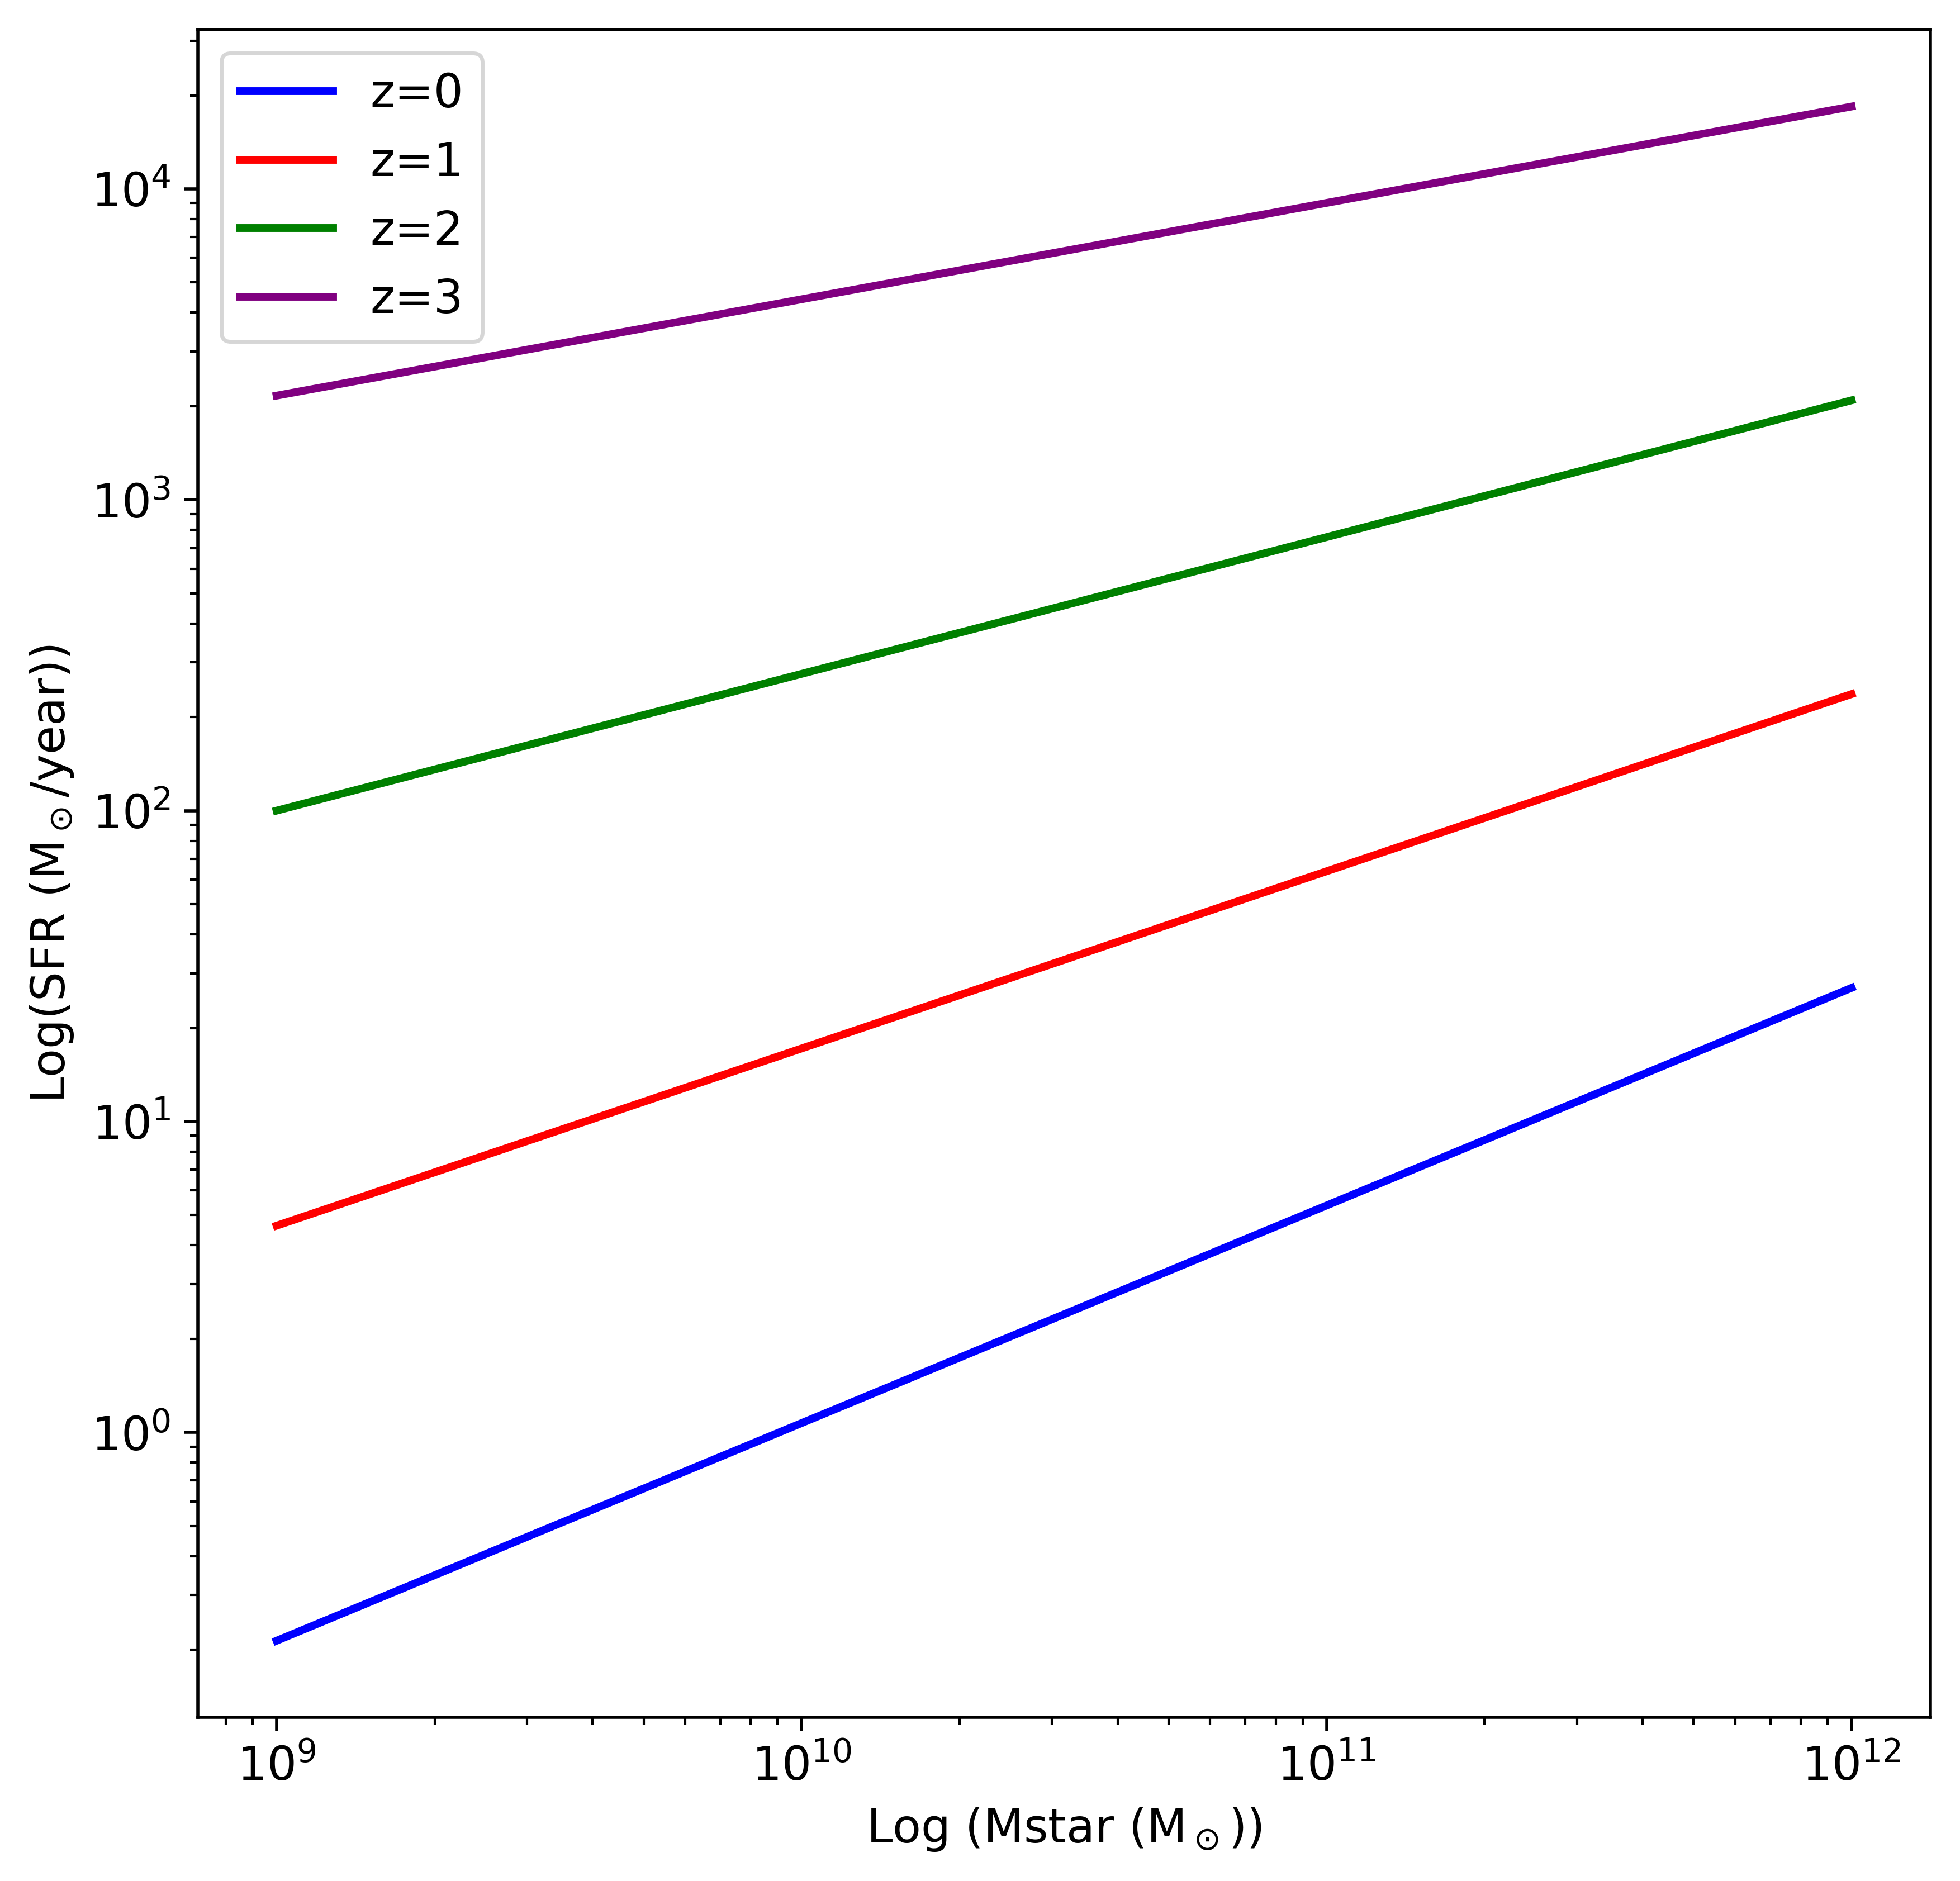

In [37]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass,10**SFRMainSequence(Mass,0),color='blue',linewidth=2,label='z=0')
plt.loglog(Mass,10**SFRMainSequence(Mass,1),color='red',linewidth=2,label='z=1')
plt.loglog(Mass,10**SFRMainSequence(Mass,2),color='green',linewidth=2,label='z=2')
plt.loglog(Mass,10**SFRMainSequence(Mass,3),color='purple',linewidth=2,label='z=3')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [38]:
# normal galaxies 
TIR_Normal = 1e10*Lsun
10**StarFormationRate(TIR_Normal,'TIR')


1.4892648150381245

In [39]:
# LIRGs  
TIR_LIRG = 1e11*Lsun
10**StarFormationRate(TIR_LIRG,'TIR')

14.892648150381245

In [40]:
# ULIRGs
TIR_ULIRG = 1e12*Lsun
10**StarFormationRate(TIR_ULIRG,'TIR')

148.92648150381245

In [41]:
# HLIRGs
TIR_HLIRG = 1e13*Lsun
10**StarFormationRate(TIR_HLIRG,'TIR')

1489.2648150381244